#Data exploration

The dataset used in this project is from Survey of Consumer Finances (SCF).The SCF is like a big questionnaire supported by the US Federal Reserve. It keeps an eye on things like money, demographic ,facts about people, and what people think in American families. They do this survey every three years, and I'll be looking at a part of the answers from 2019.

#Importing necessary libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/scfp2019.zip")
print("df shape:", df.shape)
df.head()

df shape: (28885, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


At first glance, I can see this dataset is huge, with more than 20,000 rows and 351 columns. However, in this project, my main interest lies in households either rejected for a loan or worried about getting rejected for one in the last 5 years. We can spot these households by looking at the 'TURNFEAR' column information.

In [3]:
# Create a mask to filter the DataFrame to include only households that have been turned down or feared being turned down for credit.
mask = df["TURNFEAR"] == 1

# Apply the mask to create a new DataFrame containing only the relevant households.
df_fear = df[mask]

# Display the shape (number of rows and columns) of the filtered DataFrame.
print("df_fear shape:", df_fear.shape)

# Display the first few rows of the filtered DataFrame.
df_fear.head()


df_fear shape: (4623, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


# Explore

##Race
Now that I've isolated this subgroup, let's investigate the traits and attributes within this category. One of the aspects I'll be looking into is the racial composition, as indicated by the "RACE" feature.

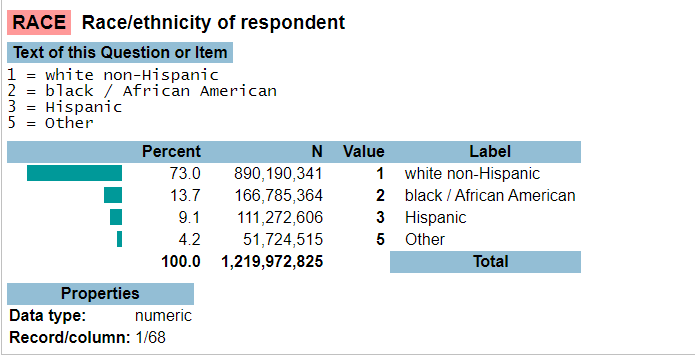

When I refer to the Code Book for 'RACE,' I notice that it lists four categories. However, it's important to highlight that we don't have all four categories represented in this dataset. If there were a value for 4, it could reasonably be assigned to 'Asian American / Pacific Islander,' a group seemingly missing from the dataset. This absence is quite unusual. The key takeaway here is that this dataset may not offer a comprehensive representation of racial diversity in America.

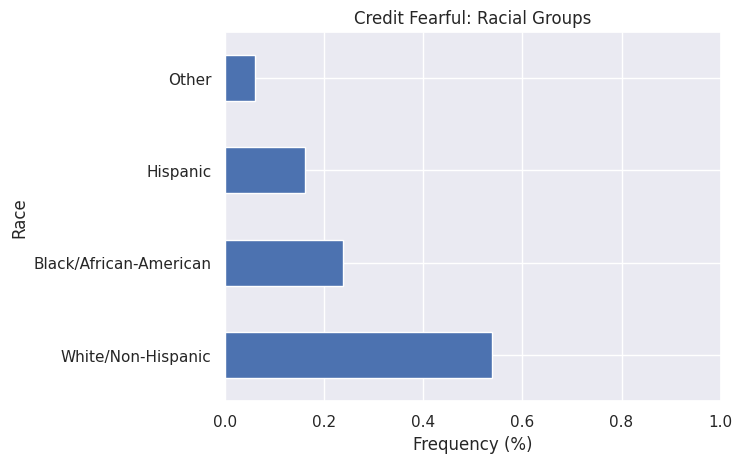

In [22]:
# Define a dictionary to map race codes to their corresponding categories.
race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other",
}

# Replace the race codes in the DataFrame with their descriptive labels.
race = df_fear["RACE"].replace(race_dict)

# Calculate the relative frequency (percentage) of each racial group.
race_value_counts = race.value_counts(normalize=True)

# Create a horizontal bar chart to visualize the distribution of racial groups.
race_value_counts.plot(kind="barh")

# Set the x-axis limits to ensure it always starts from zero and ends at 1.
plt.xlim((0, 1))

# Label the x-axis as "Frequency (%)" and the y-axis as "Race."
plt.xlabel("Frequency (%)")
plt.ylabel("Race")

# Set the title of the plot.
plt.title("Credit Fearful: Racial Groups");


This indicates that individuals of White/Non-Hispanic ethnicity tend to express greater concerns about credit denial. However, upon careful consideration, this pattern may be influenced by the fact that White/Non-Hispanic individuals constitute a larger portion of the United States population compared to other racial groups. Moreover, it's worth noting that the survey sample was intentionally selected to represent the entire population, which can also contribute to this observed trend.

Text(0.5, 1.0, 'SCF Respondents: Racial Groups')

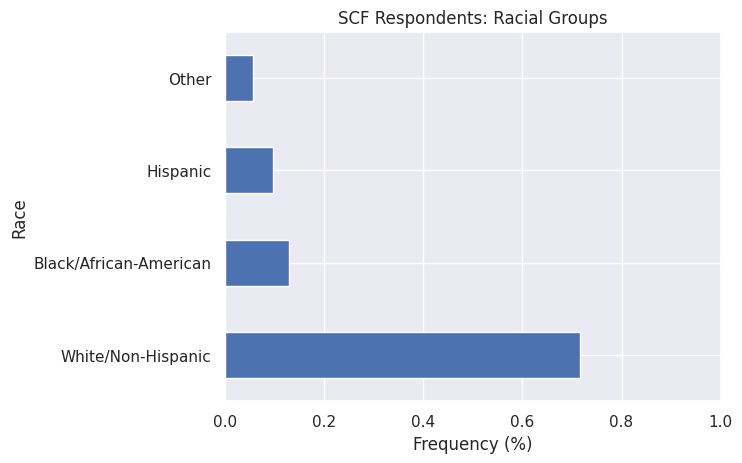

In [21]:
# Replace the race codes in the entire dataset with their descriptive labels.
race = df["RACE"].replace(race_dict)

# Calculate the relative frequency (percentage) of each racial group in the entire dataset.
race_value_counts = race.value_counts(normalize=True)

# Create a horizontal bar chart to visualize the distribution of racial groups in the entire dataset.
race_value_counts.plot(kind="barh")

# Set the x-axis limits to ensure it always starts from zero and ends at 1.
plt.xlim((0, 1))

# Label the x-axis as "Frequency (%)" and the y-axis as "Race."
plt.xlabel("Frequency (%)")
plt.ylabel("Race")

# Set the title of the plot.
plt.title("SCF Respondents: Racial Groups")


How does this second bar chart change how I see the first one? Well, I notice a couple of things. First, White Non-Hispanic people make up about 70% of the entire dataset, but only 54% of those who are worried about credit. Second, Black and Hispanic people are about 23% of the entire dataset, but they make up 40% of those who are worried about credit. In simple terms, it means that Black and Hispanic households are actually more likely to be in the group of people who worry about credit.

##Age

In [7]:
age_groups = df_fear["AGECL"].unique()
print("Age Groups:", age_groups)

Age Groups: [3 5 1 2 4 6]


Looking at the Code Book I can see that "AGECL" represents categorical data, even though the values in the column are numeric

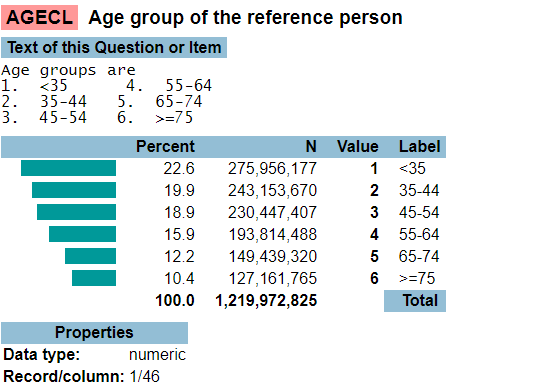

In [8]:
# Create a Series called 'age_cl' that contains observations from the "AGECL" column using descriptive group names.
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl = df_fear["AGECL"].replace(agecl_dict)

# Display the first few rows of the 'age_cl' Series.
age_cl.head()


5    45-54
6    45-54
7    45-54
8    45-54
9    45-54
Name: AGECL, dtype: object

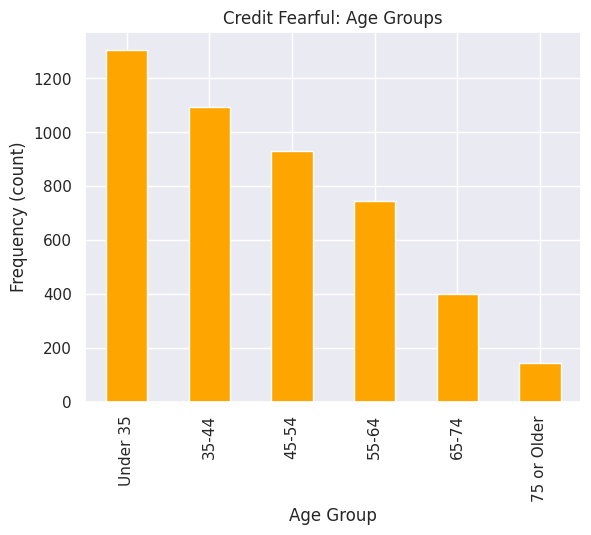

In [20]:
# Calculate the value counts for each age group in the 'age_cl' Series.
age_cl_value_counts = age_cl.value_counts()

# Create a bar chart to visualize the distribution of age groups.
age_cl_value_counts.plot(
    kind="bar",
    xlabel="Age Group",
    ylabel="Frequency (count)",
    title="Credit Fearful: Age Groups",
    color="orange"
);


The above chart is showing that lots of folks who worry about not getting a loan are younger. But the first two age groups include a broader range of ages compared to the other four. So, it might be a good idea for me to dig deeper into those numbers to understand the data better. I can use a histogram to do that.

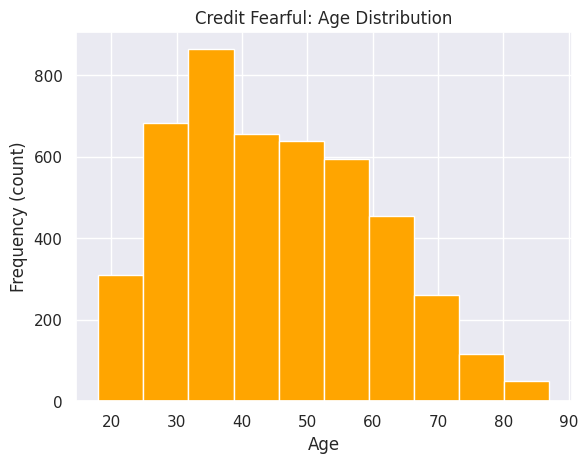

In [19]:
# Plot histogram of "AGE" with orange bars
df_fear["AGE"].hist(bins=10, color="orange")
plt.xlabel("Age")
plt.ylabel("Frequency (count)")
plt.title("Credit Fearful: Age Distribution");



I see that younger folks are still more worried about getting a loan compared to older folks. But the folks who are most worried seem to be in the age group between 30 and 40."

## Income

I'm curious about income levels. Do folks with lower incomes worry about getting a loan denial, or is it something that concerns people with more money? To find out, I'll compare the whole dataset to our subgroup using the 'INCCAT' feature, which categorizes income into different groups. This time, I'll create a single bar chart that shows the comparison side by side.

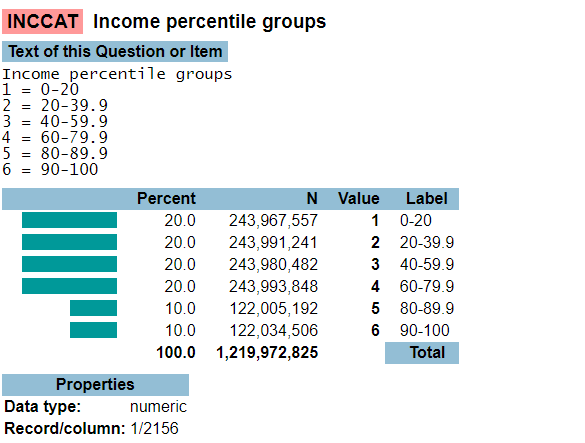

In [15]:
# Create a DataFrame called 'df_inccat' that displays the normalized frequency of income categories
# for both credit fearful and non-credit fearful households in the dataset.
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat = (
    df["INCCAT"]
    .replace(inccat_dict)
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    .rename("Frequency")
    .to_frame()
    .reset_index()
)

# Display the 'df_inccat' DataFrame.
df_inccat


,TURNFEAR,INCCAT,Frequency
0,0,90-100,0.297296
1,0,60-79.9,0.174841
2,0,40-59.9,0.143146
3,0,0-20,0.140343
4,0,21-39.9,0.135933
5,0,80-89.9,0.108441
6,1,0-20,0.288125
7,1,21-39.9,0.256327
8,1,40-59.9,0.228856
9,1,60-79.9,0.132598


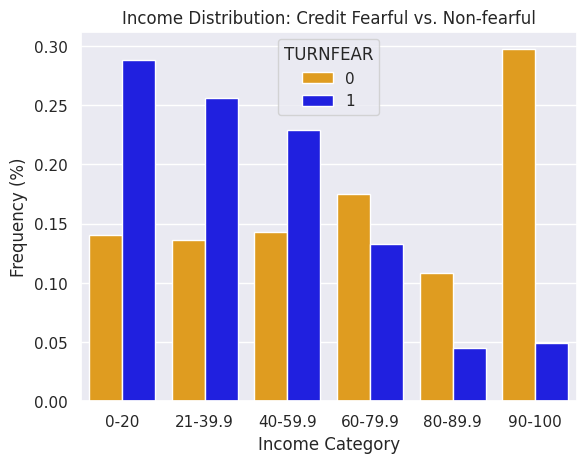

In [18]:
# Define custom colors for the bars
colors = ["orange", "blue"]

# Set the background
sns.set(style="darkgrid")

# Create a side-by-side bar chart of 'df_inccat' with custom colors on a black background
sns.barplot(
    x="INCCAT",
    y="Frequency",
    hue="TURNFEAR",
    data=df_inccat,
    order=inccat_dict.values(),
    palette=colors  # Use the custom colors
)
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful");


When I look at the income categories for those who are worried about getting credit approval after being denied in the past five years, it's clear that most of them have lower incomes. In other words, people who are worried about credit tend to earn less money.

So, what can I conclude from this? Well, among those who said they were concerned about being approved for credit after being denied in the past five years, the largest group consists of young people with lower incomes. This makes sense, right? Young folks usually earn less money and often rely on credit to start their lives, so being denied credit makes them anxious about their future.

##Assets

Calculate the correlation coefficient for "ASSET" and "HOUSES" in the whole dataset df.

In [23]:
asset_house_corr = df["ASSET"].corr(df["HOUSES"])
print("SCF: Asset Houses Correlation:", asset_house_corr)

SCF: Asset Houses Correlation: 0.5198273544779252


That's a moderately positive correlation, which I would anticipate. For a lot of folks in the United States, the worth of their main home constitutes a significant portion of their total assets. But what about the folks in my TURNFEAR group? I'll calculate that correlation to see if there's any difference.

 Calculate the correlation coefficient for "ASSET" and "HOUSES" in the whole credit-fearful subset df_fear.

In [24]:
asset_house_corr = df_fear["ASSET"].corr(df_fear["HOUSES"])
print("Credit Fearful: Asset Houses Correlation:", asset_house_corr)

Credit Fearful: Asset Houses Correlation: 0.583287973597916


Oh,They're not the same! It's still a moderate positive correlation, but the correlation between the overall asset value and the primary residence value is more pronounced for my TURNFEAR group compared to the entire population.

Now, I'll create correlation matrices for the rest of the data in both the entire dataset and my TURNFEAR subgroup. I'll focus on just five features: 'ASSET,' 'HOUSES,' 'INCOME,' 'DEBT,' and 'EDUC' to see if these differences continue.

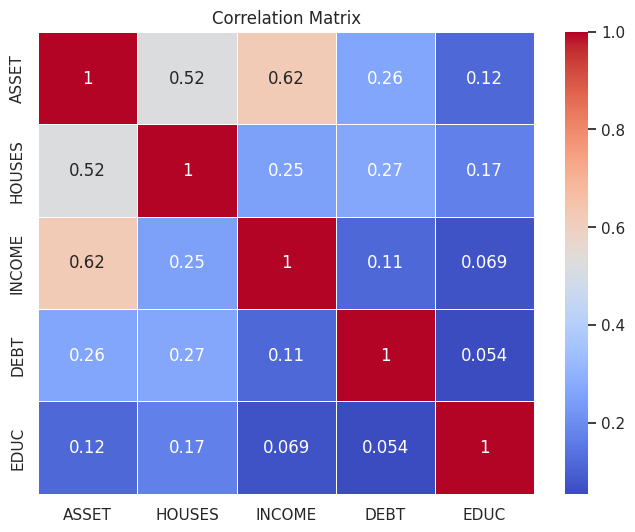

In [26]:
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df[cols].corr()

# Create a heatmap of the correlation matrix with a specific color palette
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")

plt.show()

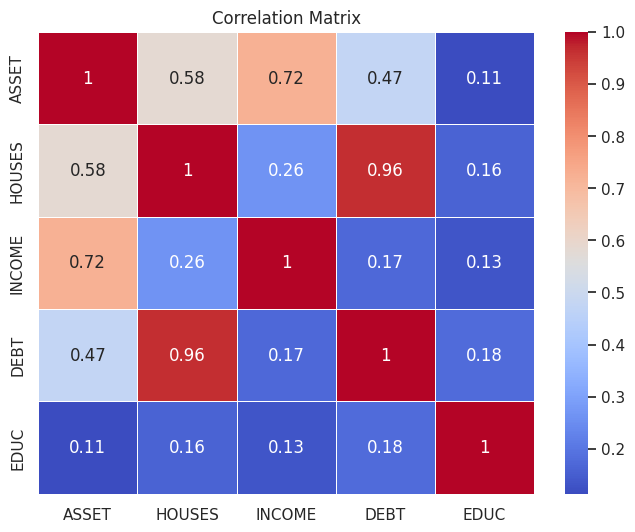

In [27]:
corr = df_fear[cols].corr()

# Create a heatmap of the correlation matrix with a specific color palette
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")

plt.show()

Wow! There are some really important differences I've found! The correlation between "DEBT" and "HOUSES" is positive for both datasets, but in the case of df, it's not very strong at 0.26, while for df_fear, it's much stronger at 0.96.

 For  "TURNFEAR" group, their main source of debt seems to be their primary residence, which makes sense.

 There are also noticeable differences between "DEBT" and "ASSET," as well as between "EDUC" and "DEBT." While not as extreme as the first one, they're still big enough to be interesting, especially if I were a banker.




## Education

I will start with education levels "EDUC", comparing credit fearful and non-credit fearful groups.

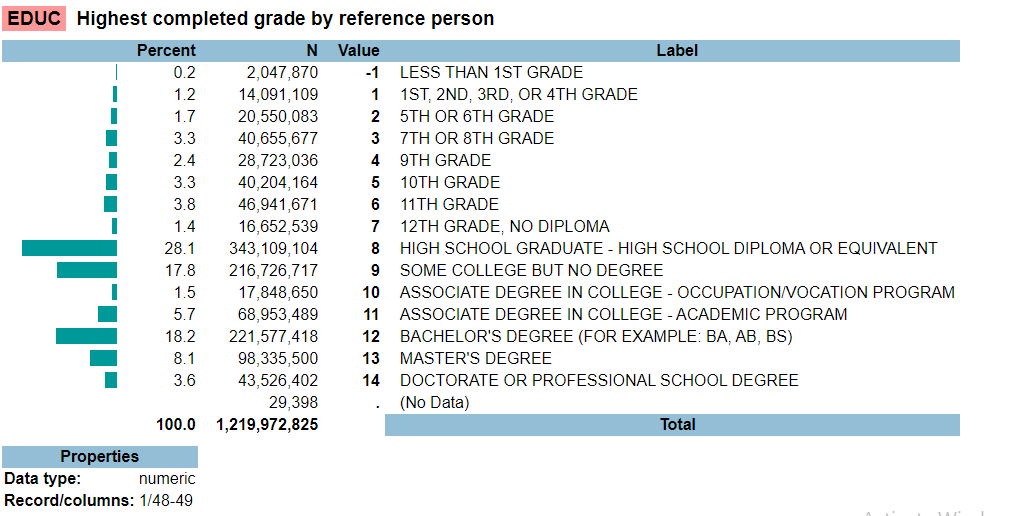

In [28]:
# Create a DataFrame df_educ that shows the normalized frequency for education categories
# for both the credit fearful and non-credit fearful households in the dataset.
df_educ = (
    df["EDUC"]
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    .rename("frequency")
    .to_frame()
    .reset_index()
)
df_educ.head()


,TURNFEAR,EDUC,frequency
0,0,12,0.257481
1,0,8,0.192029
2,0,13,0.149823
3,0,9,0.129833
4,0,14,0.096117


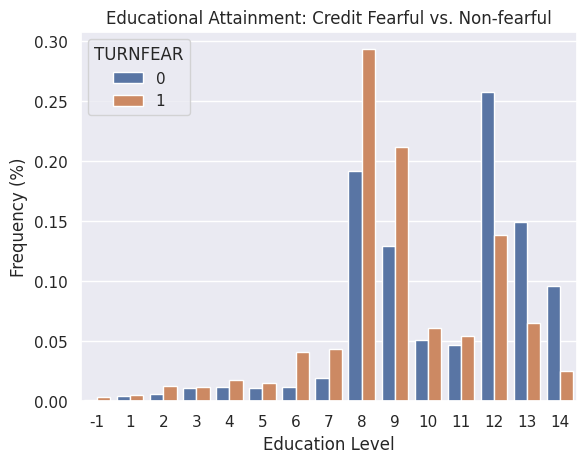

In [29]:
# Create side by side bar chart of `df_educ`
sns.barplot(
x="EDUC",y="frequency",hue="TURNFEAR",data=df_educ
)
plt.xlabel("Education Level")
plt.ylabel("Frequency (%)")
plt.title("Educational Attainment: Credit Fearful vs. Non-fearful");

From the above chart, I can notice that a lot more of the people worried about their credit have only finished high school, while those who aren't worried tend to have university degrees.






## Debt

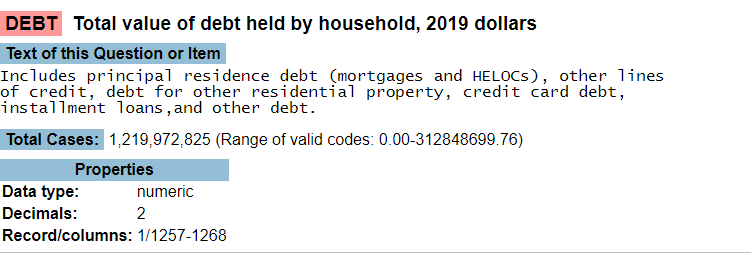

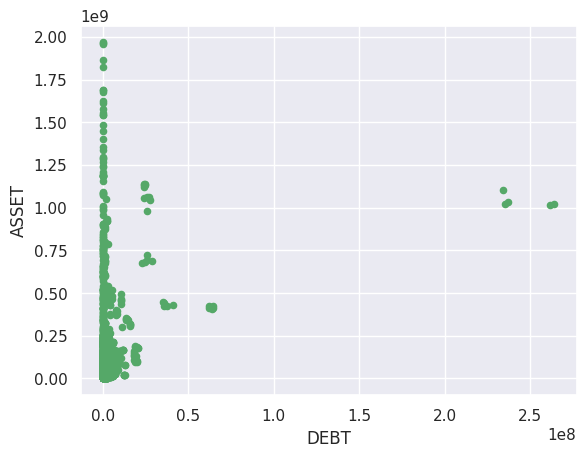

In [31]:
# Create scatter plot of ASSET vs DEBT, df
df.plot.scatter(x="DEBT",y="ASSET",color="g");

Having a lot of debt doesn't always mean you have a lot of assets, and vice versa.






<Axes: xlabel='DEBT', ylabel='ASSET'>

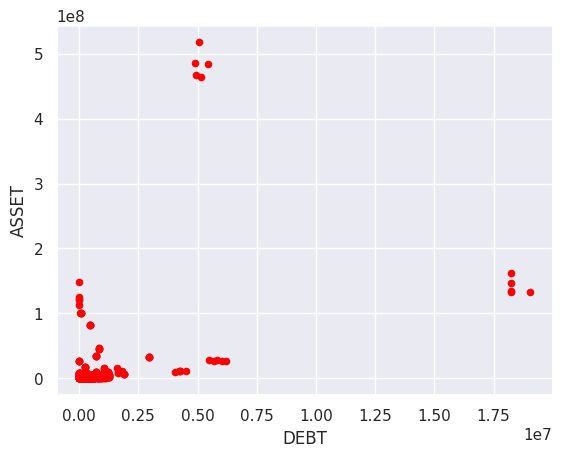

In [35]:
# Create scatter plot of ASSET vs DEBT, df_fear
df_fear.plot.scatter(x="DEBT", y="ASSET", color="red")


In the scatterplot for our df_fear data, I notice that the relationship between the variables is less steep compared to the scatterplot for our df data. It's clear that these two scatterplots are distinct from each other.

Now, let's focus on the most noticeable difference we found in our matrices and create scatter plots to illustrate the contrast between "HOUSES" and "DEBT."






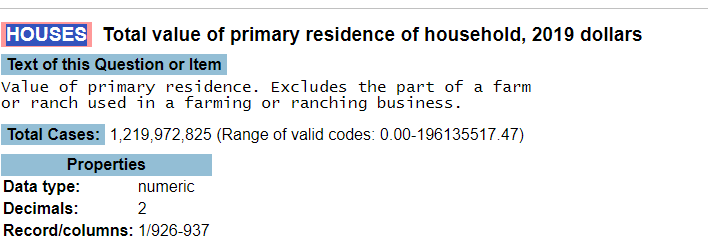

<Axes: xlabel='DEBT', ylabel='HOUSES'>

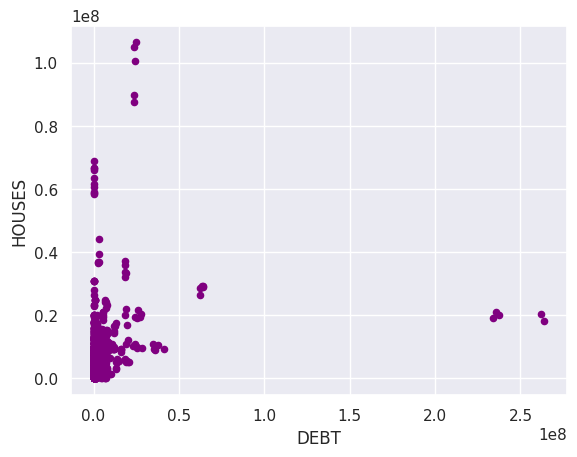

In [38]:
# Create scatter plot of HOUSES vs DEBT, df
df.plot.scatter(x="DEBT", y="HOUSES", color="purple")



Based on what I see in the graph and what   I've found in previous results, there seems to be a moderate correalation. It implies that as your debt goes up, the value of your home also tends to go up. This probably happens because a significant part of your debt is associated with your mortgage.

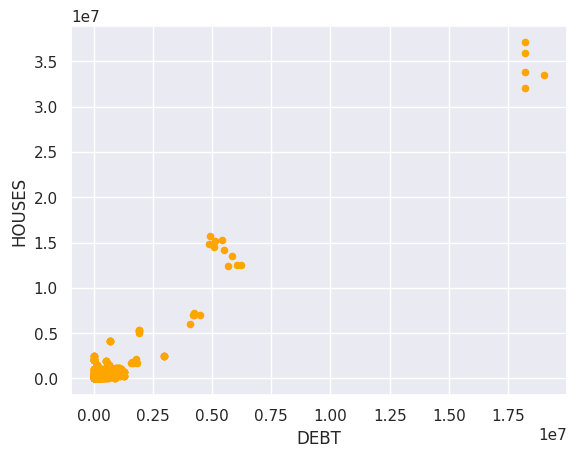

In [39]:
# Create scatter plot of HOUSES vs DEBT, df_fear
df_fear.plot.scatter(x="DEBT",y="HOUSES",color ="orange");


The outliers in the data make it a bit challenging to see the distinction between these two plots, but the correalation between them is still evident: in our df_fear data, there's an almost perfect straight-line relationship, whereas in our df data, it's a bit more mixed up.